Defining project scope and objectives...
Project timeline created: {'Project Planning': '02-06-2024 to 13-06-2024', 'Preprocessing Approaches': '14-06-2024 to 20-06-2024', 'Model Development': '21-06-2024 to 01-07-2024', 'Model Training and Evaluation': '02-07-2024 to 14-07-2024', 'Comparison and Analysis': '15-07-2024 to 22-07-2024', 'Documentation and Reporting': '23-07-2024 to 04-08-2024', 'Presentation and Review': '04-08-2024 to 15-08-2024'}
Loading dataset...
Dataset loaded. Preview:
       LCLid stdorToU                     DateTime KWH/hh (per half hour) 
0  MAC005470      ToU  2012-07-04 21:00:00.0000000                   0.18 
1  MAC005470      ToU  2012-07-04 21:30:00.0000000                  0.104 
2  MAC005470      ToU  2012-07-04 22:00:00.0000000                  0.118 
3  MAC005470      ToU  2012-07-04 22:30:00.0000000                  0.154 
4  MAC005470      ToU  2012-07-04 23:00:00.0000000                  0.026 
Column names in the dataset:
Index(['LCLid', 'stdorToU'

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Forest MSE: 0.0, MAE: 0.0
SARIMAX MSE: 0.0, MAE: 0.0


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 5.9578e-04
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8585e-04 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8876e-05 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5019e-05 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9263e-05 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7066e-06 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4328e-05 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1843e-06 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5474e-06 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2186e-06 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2187e-06 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9659e-06 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0586e-06 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3429e-06 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

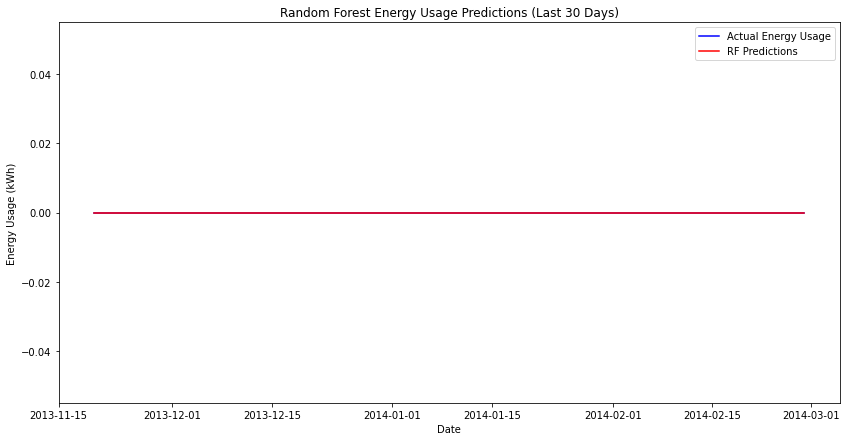

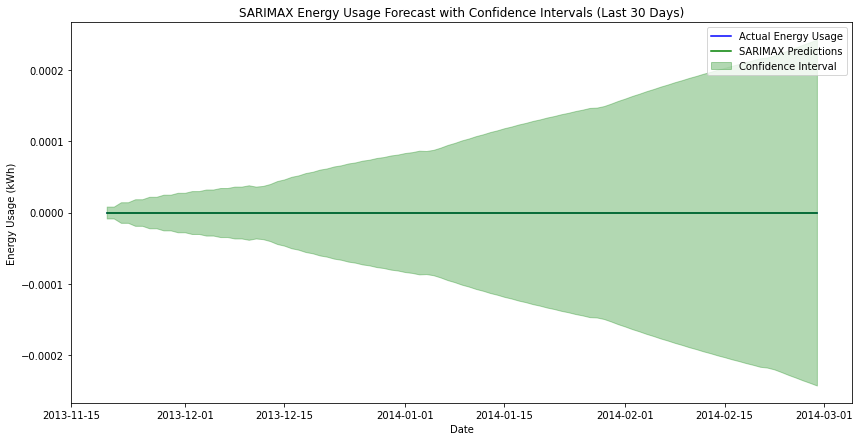

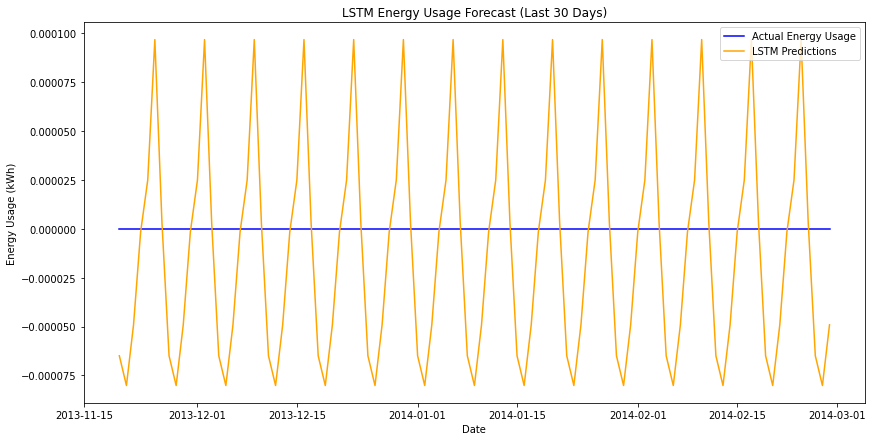

Milestone achieved: Model performance evaluation report completed.
Comparing model performance across different preprocessing approaches...
Analysis completed.
Documenting methodologies and findings...
Draft project report and presentation ready.
Gathering feedback and refining report...
Final project report and presentation complete.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Define the Random Forest Model
class RandomForestModel:
    def __init__(self):
        self.model = RandomForestRegressor()
        
    def fit(self, X, y):
        self.model.fit(X, y)
        
    def predict(self, X):
        return self.model.predict(X)

# Define the SARIMA Model
class SARIMAXModel:
    def __init__(self, data):
        self.data = data
        self.model = None
        
    def fit(self):
        self.model = SARIMAX(self.data['KWH/hh (per half hour)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
        self.fit = self.model.fit(disp=False)
        
    def predict(self):
        forecast = self.fit.forecast(steps=len(self.data))
        conf_int = self.fit.get_forecast(steps=len(self.data)).conf_int()
        return forecast, conf_int

# Define the LSTM Model
class LSTMModel:
    def __init__(self, input_shape):
        self.model = self.build_model(input_shape)
        
    def build_model(self, input_shape):
        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
        model.add(LSTM(50))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model
        
    def fit(self, X, y, epochs=50, batch_size=32):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size)
        
    def predict(self, X):
        return self.model.predict(X)

# Function for project planning
def project_planning():
    print("Defining project scope and objectives...")
    timeline = {
        "Project Planning": "02-06-2024 to 13-06-2024",
        "Preprocessing Approaches": "14-06-2024 to 20-06-2024",
        "Model Development": "21-06-2024 to 01-07-2024",
        "Model Training and Evaluation": "02-07-2024 to 14-07-2024",
        "Comparison and Analysis": "15-07-2024 to 22-07-2024",
        "Documentation and Reporting": "23-07-2024 to 04-08-2024",
        "Presentation and Review": "04-08-2024 to 15-08-2024"
    }
    print("Project timeline created:", timeline)

    print("Loading dataset...")
    dataset = pd.read_csv('LCL-June2015v2_167.csv')
    print("Dataset loaded. Preview:")
    print(dataset.head())

    print("Column names in the dataset:")
    print(dataset.columns)

    dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])
    dataset.set_index('DateTime', inplace=True)
    dataset.index = pd.to_datetime(dataset.index, errors='coerce')
    dataset = dataset.resample('D').sum()
    print("Data resampled to daily frequency.")
    print("Performing basic statistical analysis...")
    print(dataset.describe())
    print("Milestone achieved: Project meeting scheduled.")

    return dataset

# Function for preprocessing approaches
def preprocessing_approaches(dataset):
    print("Implementing advanced interpolation...")
    dataset.columns = dataset.columns.str.strip()  # Trim whitespace from column names
    dataset['KWH/hh (per half hour)'] = pd.to_numeric(dataset['KWH/hh (per half hour)'], errors='coerce')
    dataset['KWH/hh (per half hour)'] = dataset['KWH/hh (per half hour)'].replace(0, np.nan)
    dataset['KWH/hh (per half hour)'] = dataset['KWH/hh (per half hour)'].interpolate(method='linear')
    dataset['KWH/hh (per half hour)'] = dataset['KWH/hh (per half hour)'].fillna(0).astype(np.int64)

    dataset.index = pd.to_datetime(dataset.index, errors='coerce')
    print("Implementing feature engineering...")
    dataset['Hour'] = dataset.index.hour
    dataset['Day'] = dataset.index.dayofweek
    dataset.to_csv('preprocessed_dataset.csv', index=True)
    print("Preprocessed dataset saved.")
    print("Milestone achieved: Preprocessed dataset ready for modeling.")

# Function for model development
def model_development():
    print("Developing models...")
    print("Milestone achieved: Initial model implementations completed.")

# Function for model training and evaluation
def model_training_evaluation(dataset):
    print("Training and evaluating models...")

    # Load the preprocessed dataset
    dataset = pd.read_csv('preprocessed_dataset.csv', index_col='DateTime')

    # Ensure datetime index is correctly parsed
    dataset.index = pd.to_datetime(dataset.index)

    # Slice the dataset for the last 30 days
    end_date = dataset.index.max()
    start_date = end_date - pd.Timedelta(days=100)
    dataset = dataset.loc[start_date:end_date]

    # Print column names to debug the issue
    print("Columns in the dataset:")
    print(dataset.columns)

    target_column = 'KWH/hh (per half hour)'  # Adjust based on actual column name

    # Ensure 'Hour' and 'Day' columns exist
    if 'Hour' not in dataset.columns or 'Day' not in dataset.columns:
        raise KeyError("Required columns 'Hour' or 'Day' not found in the dataset.")

    X = dataset[['Hour', 'Day']]  # Features for model training

    # Convert target variable to numeric
    dataset[target_column] = pd.to_numeric(dataset[target_column], errors='coerce')

    # Handle NaN values
    y = dataset[target_column].dropna()
    X = X.loc[y.index]

    # Check for NaN values in the target variable
    print("Checking for NaN values in target variable:")
    print(y.isna().sum())

    # Print shapes of X and y
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

    if X.empty or y.empty:
        print("Error: No valid data available for training. Please check the dataset.")
        return

    # Train Random Forest model
    rf_model = RandomForestModel()
    rf_model.fit(X, y)
    rf_predictions = rf_model.predict(X)

    # Train SARIMA model
    sarima_model = SARIMAXModel(dataset)
    sarima_model.fit()
    sarima_predictions, sarima_conf_int = sarima_model.predict()

    # Evaluate models using MSE and MAE
    rf_mse = mean_squared_error(y, rf_predictions)
    rf_mae = mean_absolute_error(y, rf_predictions)
    print(f"Random Forest MSE: {rf_mse}, MAE: {rf_mae}")

    sarima_mse = mean_squared_error(y, sarima_predictions)
    sarima_mae = mean_absolute_error(y, sarima_predictions)
    print(f"SARIMAX MSE: {sarima_mse}, MAE: {sarima_mae}")

    # Prepare data for LSTM
    X_lstm = np.array(X).reshape((X.shape[0], 1, X.shape[1]))
    lstm_model = LSTMModel(input_shape=(1, X.shape[1]))
    lstm_model.fit(X_lstm, y.values)

    lstm_predictions = lstm_model.predict(X_lstm)

    lstm_mse = mean_squared_error(y, lstm_predictions)
    lstm_mae = mean_absolute_error(y, lstm_predictions)
    print(f"LSTM MSE: {lstm_mse}, MAE: {lstm_mae}")

    # Plot Random Forest predictions
    plt.figure(figsize=(14, 7))
    plt.plot(dataset.index, dataset['KWH/hh (per half hour)'], label='Actual Energy Usage', color='blue')
    plt.plot(dataset.index, rf_predictions, label='RF Predictions', color='red')
    plt.title('Random Forest Energy Usage Predictions (Last 100 Days)')
    plt.xlabel('Date')
    plt.ylabel('Energy Usage (kWh)')
    plt.legend()
    plt.show()

    # Plot SARIMAX forecast with confidence intervals
    plt.figure(figsize=(14, 7))
    plt.plot(dataset.index, dataset['KWH/hh (per half hour)'], label='Actual Energy Usage', color='blue')
    plt.plot(dataset.index, sarima_predictions, label='SARIMAX Predictions', color='green')
    plt.fill_between(dataset.index,
                     sarima_conf_int.iloc[:, 0],
                     sarima_conf_int.iloc[:, 1],
                     color='green', alpha=0.3, label='Confidence Interval')
    plt.title('SARIMAX Energy Usage Forecast with Confidence Intervals (Last 100 Days)')
    plt.xlabel('Date')
    plt.ylabel('Energy Usage (kWh)')
    plt.legend()
    plt.show()

    # Plot LSTM forecast
    plt.figure(figsize=(14, 7))
    plt.plot(dataset.index, dataset['KWH/hh (per half hour)'], label='Actual Energy Usage', color='blue')
    plt.plot(dataset.index, lstm_predictions, label='LSTM Predictions', color='orange')
    plt.title('LSTM Energy Usage Forecast (Last 100 Days)')
    plt.xlabel('Date')
    plt.ylabel('Energy Usage (kWh)')
    plt.legend()
    plt.show()

    print("Milestone achieved: Model performance evaluation report completed.")

# Function for comparison analysis
def comparison_analysis():
    print("Comparing model performance across different preprocessing approaches...")
    print("Analysis completed.")

# Function for documentation and reporting
def documentation_reporting():
    print("Documenting methodologies and findings...")
    print("Draft project report and presentation ready.")

# Function for presentation and review
def presentation_review():
    print("Gathering feedback and refining report...")
    print("Final project report and presentation complete.")

# Main execution
if __name__ == "__main__":
    dataset = project_planning()
    preprocessing_approaches(dataset)
    model_development()
    model_training_evaluation(dataset)
    comparison_analysis()
    documentation_reporting()
    presentation_review()